In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
# Setting root

project_root = Path().resolve().parent
sys.path.append(str(project_root))

cycling_path = project_root / "data" / "aggregated_datasets" / "aggregated_fietsen.csv"


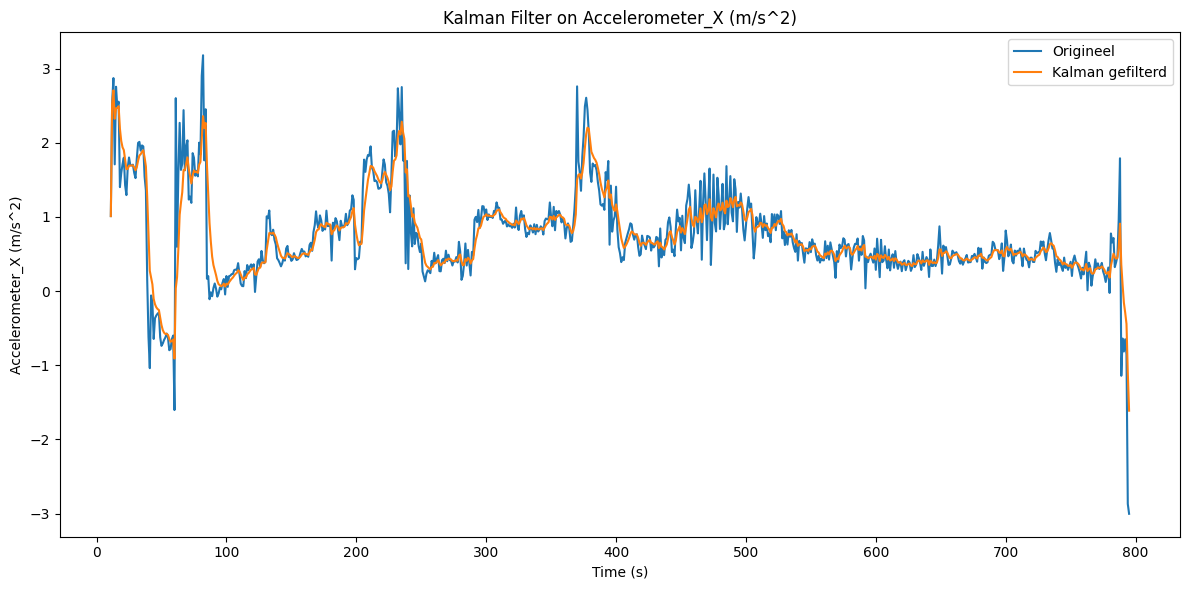

In [3]:
from src.preprocessing.remove_noise import apply_kalman_filter

# read csv
df = pd.read_csv(cycling_path)

# choose column
sensor_col = 'Accelerometer_X (m/s^2)'

# apply kalman
df[f'{sensor_col}_kalman'] = apply_kalman_filter(df[sensor_col])

# Plotten van origineel vs gefilterd
plt.figure(figsize=(12,6))
plt.plot(df['Time (s)'], df[sensor_col], label='Origineel')
plt.plot(df['Time (s)'], df[f'{sensor_col}_kalman'], label='Kalman gefilterd')
plt.xlabel('Time (s)')
plt.ylabel(sensor_col)
plt.title(f'Kalman Filter on {sensor_col}')
plt.legend()
plt.tight_layout()
plt.show()

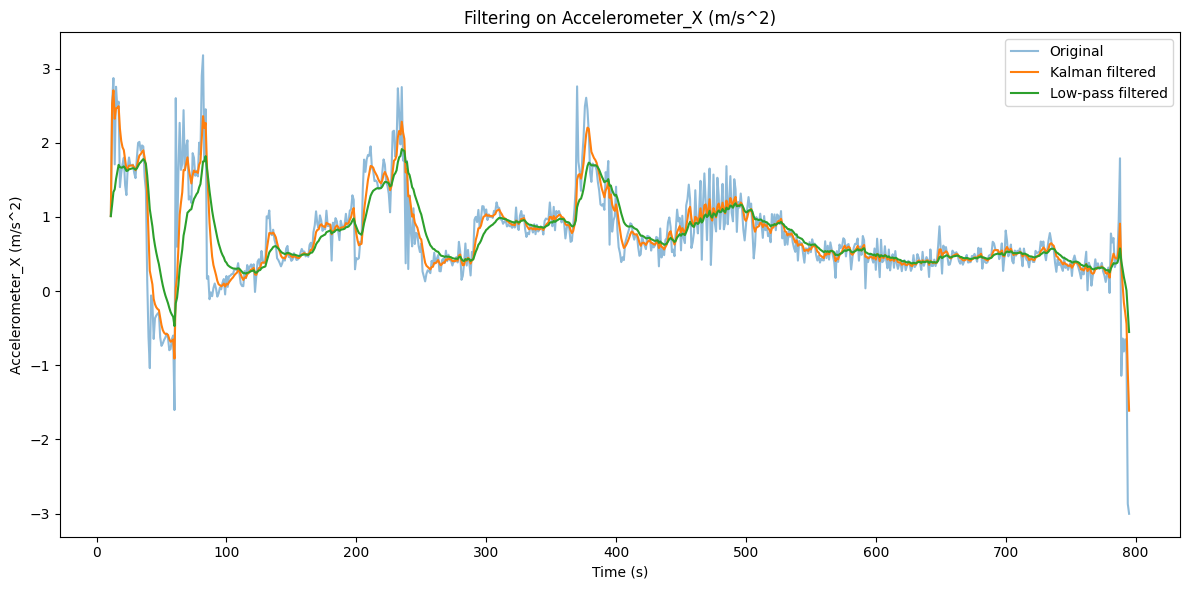

In [4]:
from src.preprocessing.remove_noise import apply_lowpass_filter 

# apply low-pass filter
df[f'{sensor_col}_lowpass'] = apply_lowpass_filter(df[sensor_col], alpha=0.1)

# Plotten van origineel vs Kalman vs Low-pass
plt.figure(figsize=(12,6))
plt.plot(df['Time (s)'], df[sensor_col], label='Original', alpha=0.5)
plt.plot(df['Time (s)'], df[f'{sensor_col}_kalman'], label='Kalman filtered')
plt.plot(df['Time (s)'], df[f'{sensor_col}_lowpass'], label='Low-pass filtered')
plt.xlabel('Time (s)')
plt.ylabel(sensor_col)
plt.title(f'Filtering on {sensor_col}')
plt.legend()
plt.tight_layout()
plt.show()


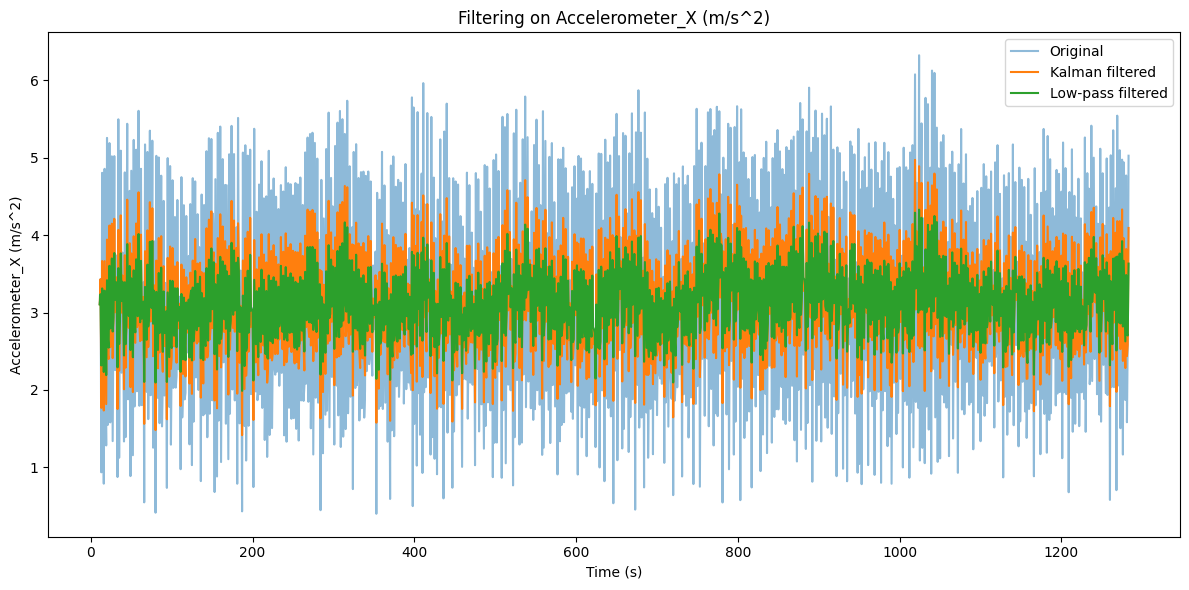

In [5]:
running_path = project_root / "data" / "aggregated_datasets" / "aggregated_rennen.csv"

# read csv
df = pd.read_csv(running_path)

# choose column
sensor_col = 'Accelerometer_X (m/s^2)'

# apply kalman
df[f'{sensor_col}_kalman'] = apply_kalman_filter(df[sensor_col], process_variance=0.002, measurement_variance=0.002)

# apply lowpass
df[f'{sensor_col}_lowpass'] = apply_lowpass_filter(df[sensor_col], alpha=0.4)

# Plotten van origineel vs Kalman vs Low-pass
plt.figure(figsize=(12,6))
plt.plot(df['Time (s)'], df[sensor_col], label='Original', alpha=0.5)
plt.plot(df['Time (s)'], df[f'{sensor_col}_kalman'], label='Kalman filtered')
plt.plot(df['Time (s)'], df[f'{sensor_col}_lowpass'], label='Low-pass filtered')
plt.xlabel('Time (s)')
plt.ylabel(sensor_col)
plt.title(f'Filtering on {sensor_col}')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_kalman = np.sqrt(mean_squared_error(df[sensor_col], df[f'{sensor_col}_kalman']))
rmse_lowpass = np.sqrt(mean_squared_error(df[sensor_col], df[f'{sensor_col}_lowpass']))

print(rmse_kalman, rmse_lowpass)


0.7688805074178308 1.0625183048846778


In [7]:
import pandas as pd

processed_car_data = project_root / "data" / "processed_datasets" / "aggregated_auto_kalman_filtered.csv"
df = pd.read_csv(processed_car_data)


print(df.head())
print(df.columns.tolist())
print(df.describe())
print(df.isna().sum())


FileNotFoundError: [Errno 2] No such file or directory: '/Users/puckvoorham/Documents/Uni/2024-2025/ML4QS_subject/ML4QS_group50/ML4QS-project/data/processed_datasets/aggregated_auto_kalman_filtered.csv'

In [ ]:
print(df["Time (s)"].head(10))     
print(df["Time (s)"].tail(10))  

print(df["Time (s)"].diff().value_counts())


0    11
1    12
2    13
3    14
4    15
5    16
6    17
7    18
8    19
9    20
Name: Time (s), dtype: int64
321    332
322    333
323    334
324    335
325    336
326    337
327    338
328    339
329    340
330    341
Name: Time (s), dtype: int64
Time (s)
1.0    330
Name: count, dtype: int64


In [ ]:
import pandas as pd

processed_running_data = project_root / "data" / "processed_datasets" / "experiment_rennen_puck.csv"
df = pd.read_csv(processed_running_data)

print(df.head())
print(df.columns.tolist())
print(df.describe())
print(df.isna().sum())


   Time (s)  Accelerometer_X (m/s^2)_kalman  Accelerometer_Y (m/s^2)_kalman  \
0        11                        3.107253                      -10.642003   
1        12                        3.428806                      -13.134410   
2        13                        2.128511                      -11.840407   
3        14                        3.154656                      -11.931934   
4        15                        3.110007                      -12.487483   

   Accelerometer_Z (m/s^2)_kalman  Gyroscope_X (rad/s)_kalman  \
0                        2.376021                   -0.043880   
1                        2.294127                   -0.162208   
2                        2.156662                   -0.129834   
3                        2.300692                   -0.093583   
4                        2.371602                   -0.092071   

   Gyroscope_Y (rad/s)_kalman  Gyroscope_Z (rad/s)_kalman  \
0                    0.076987                   -0.072449   
1           

In [ ]:
print(df["Time (s)"].head(10))     
print(df["Time (s)"].tail(10))  

print(df["Time (s)"].diff().value_counts())


0    11
1    12
2    13
3    14
4    15
5    16
6    17
7    18
8    19
9    20
Name: Time (s), dtype: int64
1263    1274
1264    1275
1265    1276
1266    1277
1267    1278
1268    1279
1269    1280
1270    1281
1271    1282
1272    1283
Name: Time (s), dtype: int64
Time (s)
1.0    1272
Name: count, dtype: int64
